Questão 3. Obtenha os seguintes dados no IPEADATA:
- Índice nacional de preços ao consumidor amplo (IPCA) geral: taxa de variação de 1980
a 2022.
- Meio de pagamento ampliado - M2 - fim de período - R$ (milhões).

Tratamento das bases de dados

In [1]:
# Bibliotecas usadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ipca = pd.read_csv(r'M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 3\Base de dados\IPCA geral.csv', delimiter=';')
m2_milhoes = pd.read_csv(r'M:\{estudos}\Macroeconomia\Macroeconomia1\Lista 1\Questão 3\Base de dados\M2 - milhões.csv', delimiter=';')

In [3]:
m2_milhoes.drop(columns=[col for col in m2_milhoes.columns if "Unnamed" in col], inplace=True, errors='ignore')
ipca.drop(columns=[col for col in ipca.columns if "Unnamed" in col], inplace=True, errors='ignore')

m2_milhoes.columns = ['Data', 'M2']
ipca.columns = ['Data', 'IPCA (% a.m.)']

In [4]:
# Converter data
def converter_data(value):
    try:
        value_str = str(value).strip()
        if '-' in value_str:
            ano, mes = map(int, value_str.split('-'))
            return pd.Timestamp(year=ano, month=mes, day=1)
        else:
            return pd.NaT
    except ValueError:
        return pd.NaT
    
    
ipca['Data'] = ipca['Data'].apply(converter_data)
m2_milhoes['Data'] = m2_milhoes['Data'].apply(converter_data)

print(ipca.info())
print(m2_milhoes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Data           539 non-null    datetime64[ns]
 1   IPCA (% a.m.)  539 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 8.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    436 non-null    datetime64[ns]
 1   M2      436 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 6.9+ KB
None


In [5]:


ipca['IPCA (% a.m.)'] = ipca['IPCA (% a.m.)'].astype(str)
ipca['IPCA (% a.m.)'] = ipca['IPCA (% a.m.)'].str.replace(',','.', regex = False).astype(float)

m2_milhoes['M2'] = m2_milhoes['M2'].astype(str)
m2_milhoes['M2'] = m2_milhoes['M2'].str.replace(',','.', regex = False).astype(float)



Siga os seguintes passos:
- i. Faça um gráfico para a série de inflação para o período completo e para dois subperíodos: 1980-1994:6 e 1994:7 em diante.
- Para o primeiro subperíodo identifique os diversos planos de estabilização no período.
- A que se deve o sucesso do Plano Real em reduzir a inflação? Qual o papel da responsabilidade fiscal?

In [6]:
ipca_1980_1994 = ipca[(ipca['Data'] >= '1980-01-01') & (ipca['Data'] <= '1994-06-01')]
ipca_1994_em_diante = ipca[ipca['Data'] >= '1994-07-01']

In [7]:
ipca['IPCA (% a.m.)'] = ipca['IPCA (% a.m.)']/100

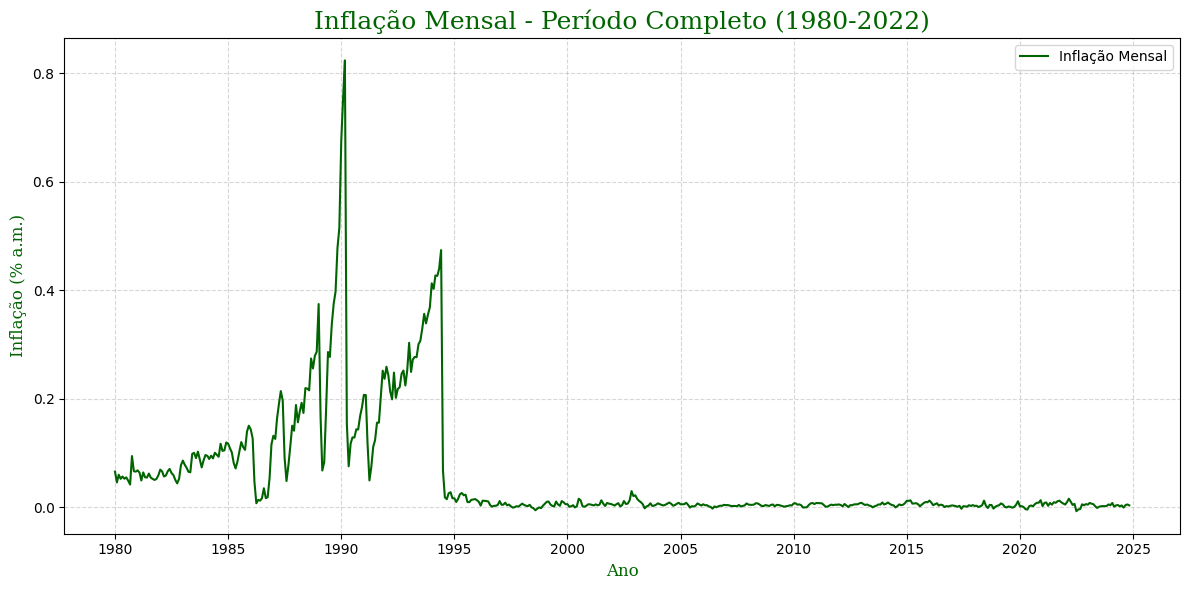

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(ipca['Data'], ipca['IPCA (% a.m.)'], label='Inflação Mensal', color='darkgreen')
plt.title('Inflação Mensal - Período Completo (1980-2022)',  fontdict={'family':'serif','color':'darkgreen','size':18})
plt.xlabel('Ano', fontdict={'family':'serif','color':'darkgreen','size':12})
plt.ylabel('Inflação (% a.m.)', fontdict={'family':'serif','color':'darkgreen','size':12})
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


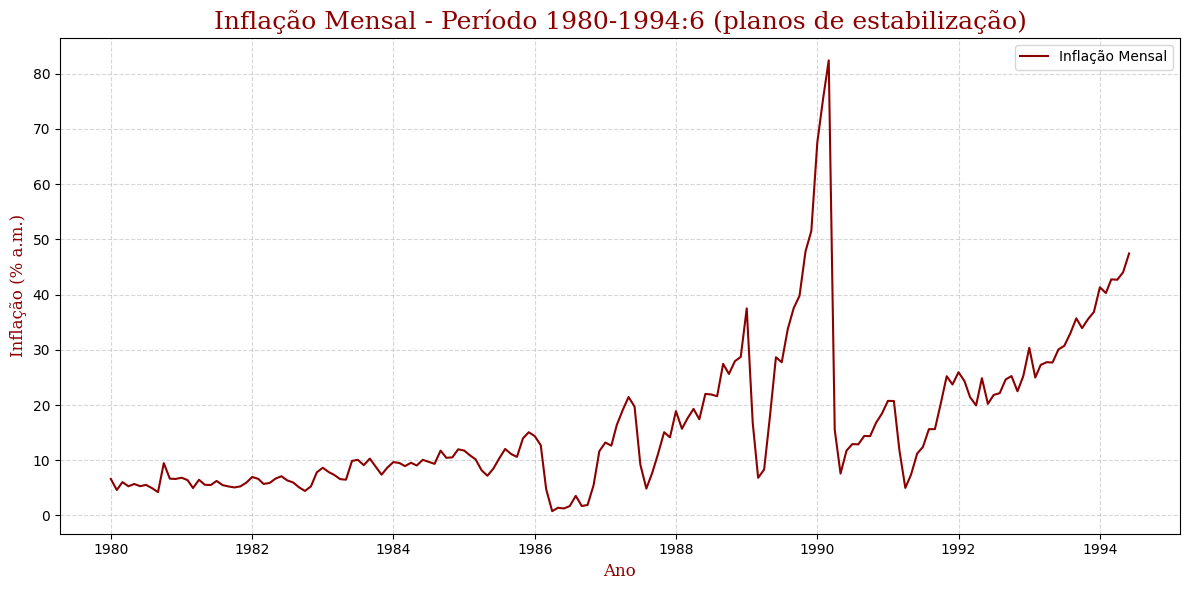

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(ipca_1980_1994['Data'], ipca_1980_1994['IPCA (% a.m.)'], label='Inflação Mensal', color='darkred')
plt.title('Inflação Mensal - Período 1980-1994:6 (planos de estabilização)', fontdict={'family':'serif','color':'darkred','size':18})
plt.xlabel('Ano', fontdict={'family':'serif','color':'darkred','size':12})
plt.ylabel('Inflação (% a.m.)', fontdict={'family':'serif','color':'darkred','size':12})
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

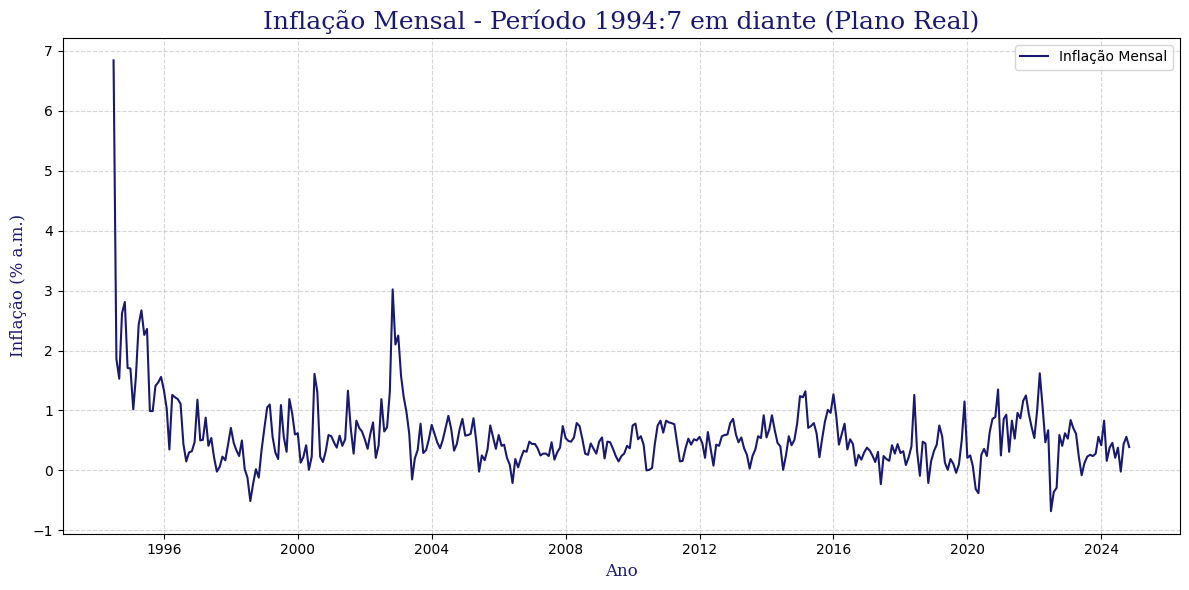

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(ipca_1994_em_diante['Data'], ipca_1994_em_diante['IPCA (% a.m.)'], label='Inflação Mensal', color='midnightblue')
plt.title('Inflação Mensal - Período 1994:7 em diante (Plano Real)', fontdict={'family':'serif','color':'midnightblue','size':18})
plt.xlabel('Ano', fontdict={'family':'serif','color':'midnightblue','size':12})
plt.ylabel('Inflação (% a.m.)', fontdict={'family':'serif','color':'midnightblue','size':12})
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


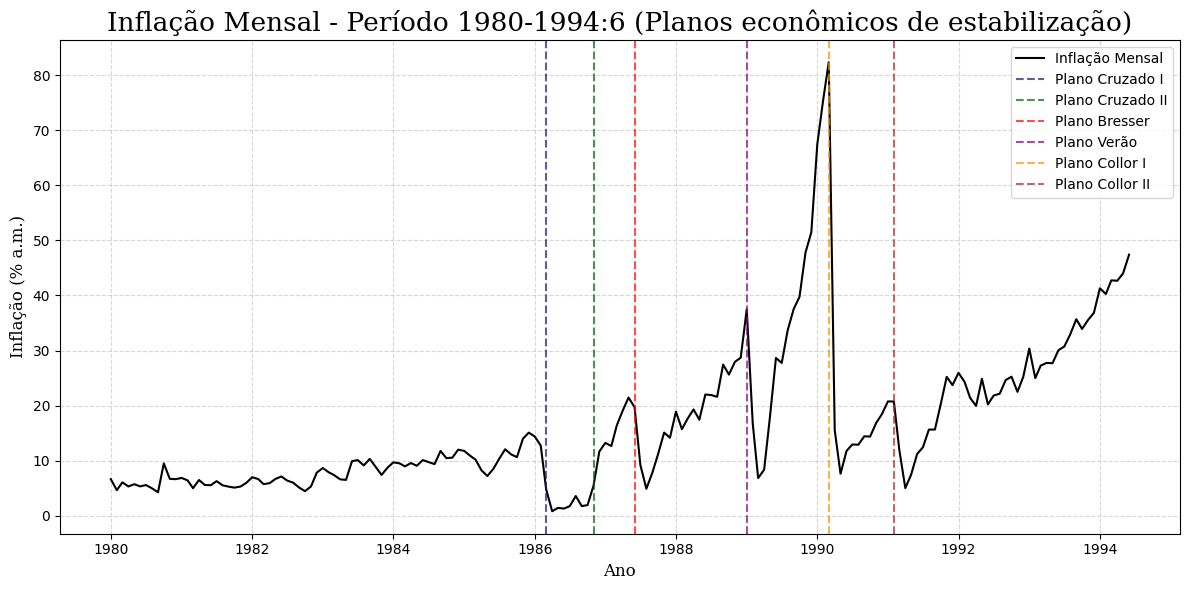

In [11]:
# Datas dos principais planos econômicos
planos = {
    "Plano Cruzado I": "1986-03-01",
    "Plano Cruzado II": "1986-11-01",
    "Plano Bresser": "1987-06-01",
    "Plano Verão": "1989-01-01",
    "Plano Collor I": "1990-03-01",
    "Plano Collor II": "1991-02-01"
}

plt.figure(figsize=(12, 6))
plt.plot(ipca_1980_1994['Data'], ipca_1980_1994['IPCA (% a.m.)'], label='Inflação Mensal', color='black')

cores = ['midnightblue', 'darkgreen', 'red', 'purple', 'darkorange', 'brown']

for (plano, data), cor in zip(planos.items(), cores):
    plt.axvline(pd.Timestamp(data), color=cor, linestyle='--', alpha=0.7, label=plano)

plt.title('Inflação Mensal - Período 1980-1994:6 (Planos econômicos de estabilização)', fontdict={'family':'serif','color':'black','size':19})
plt.xlabel('Ano', fontdict={'family':'serif','color':'black','size':12})
plt.ylabel('Inflação (% a.m.)', fontdict={'family':'serif','color':'black','size':12})
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


O sucesso do Plano Real (1994:7 em diante) se deu por fatores como a âncora cambial, onde o real foi atrelado ao dólar, criando confiança na moeda, ao controle fiscal com a redução do déficit orçamentário e adoção de metas de inflação.
A criação da Lei de Responsabilidade Fiscal (2000) foi essencial para evitar a emissão de moeda para cobrir déficits, o que era uma das principais causas da hiperinflação. Ao controlar os gastos, estabilizar a dívida e adotar metas de inflação, o governo conseguiu uma melhor estabilidade econômica ao longo prazo.


### ii. Agora calcule a taxa de variação da série de M2 para todo o período disponível. Feito isto, faça um gráfico colocando a taxa de variação (em %) de M2 junto com a taxa de inflação para o período 1988:8-1994:6.

In [12]:
# Taxa de variação de M2
m2_milhoes['Taxa_Variacao_M2'] = m2_milhoes['M2'].pct_change() * 100  

In [13]:
# Filtrando o período (1988:8 até 1994:6) para inflação e M2
periodo_inicio = pd.Timestamp('1988-08-01')
periodo_fim = pd.Timestamp('1994-06-01')

ipca_periodo = ipca[(ipca['Data'] >= periodo_inicio) & (ipca['Data'] <= periodo_fim)]
m2_milhoes_periodo = m2_milhoes[(m2_milhoes['Data'] >= periodo_inicio) & (m2_milhoes['Data'] <= periodo_fim)]


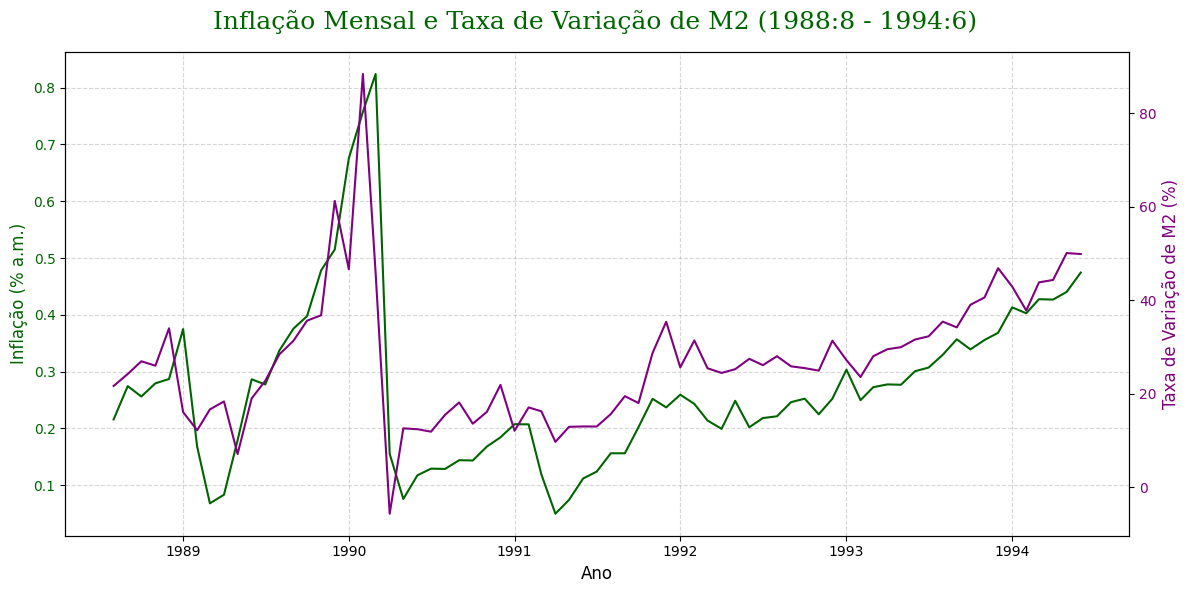

In [14]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# eixo - IPCA
ax1.plot(ipca_periodo['Data'], ipca_periodo['IPCA (% a.m.)'], color='darkgreen', label='Inflação Mensal')
ax1.set_xlabel('Ano', fontsize=12)
ax1.set_ylabel('Inflação (% a.m.)', color='darkgreen', fontsize=12)
ax1.tick_params(axis='y', labelcolor='darkgreen')
ax1.grid(True, linestyle='--', alpha=0.5)

# eixo - Taxa de variação de M2
ax2 = ax1.twinx()
ax2.plot(m2_milhoes_periodo['Data'], m2_milhoes_periodo['Taxa_Variacao_M2'], color='purple', label='Taxa de Variação de M2')
ax2.set_ylabel('Taxa de Variação de M2 (%)', color='purple', fontsize=12)
ax2.tick_params(axis='y', labelcolor='purple')


fig.suptitle('Inflação Mensal e Taxa de Variação de M2 (1988:8 - 1994:6)', fontsize=18, fontdict={'family': 'serif', 'color': 'darkgreen'})
fig.tight_layout()
plt.show()

### iii. Diante dos resultados, o que você pode dizer sobre a frase de Milton Friedman de que: “Inflation is always and everywhere a monetary phenomenon, in the sense that it is and can be produced only by a more rapid increase in the quantity of money than in output.”?
A frase de Milton Friedman se aplica ao contexto analisado, pois os dados mostram que o excesso de emissão monetária, sem correspondência com o crescimento da produção, foi um dos principais fatores da hiperinflação no Brasil pré-Plano Real. O sucesso do Plano Real e da Lei de Responsabilidade Fiscal reforça essa visão, ao demonstrar que o controle da base monetária, aliado à responsabilidade fiscal, foi crucial para estabilizar a inflação e garantir a confiança na moeda.